# Customer Churn Analysis


## Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Set visualization styles for consistency and aesthetics

In [2]:
sns.set(style="whitegrid")

## Loading the Dataset

- Download the dataset @ https://www.kaggle.com/datasets/blastchar/telco-customer-churn?resource=download

In [7]:
data = pd.read_csv(r'E:\Data Analysis Projects\Customer Churn Analysis\Customer_Churn.csv') # Update with actual dataset file name or path of your own

In [8]:
# Display the first few rows of the dataset
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Dataset Overview

In [9]:
# Display general information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [48]:
data['TotalCharges'] = data['TotalCharges'].replace(" ","0")
data['TotalCharges'] = data['TotalCharges'].astype("float")

### Check for missing values in the dataset

In [10]:
missing_values = data.isnull().sum()
print("Missing values per column:\n", missing_values)

Missing values per column:
 customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


## Summary statistics for numerical columns

In [11]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


### Check for duplicate customer IDs

In [24]:
data['customerID'].duplicated().sum()

np.int64(0)

### Convert 0s and 1s in SeniorCitizen column to "no" and "yes" respectively

In [25]:
def convert_to_yes_no(value):
    return "yes" if value == 1 else "no"

In [28]:
data['SeniorCitizen'] = data['SeniorCitizen'].apply(convert_to_yes_no)
data.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,no,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,no,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,no,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,no,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,no,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


## Exploratory Data Analysis
## Univariate Analysis
### Visualize the distribution of churn values

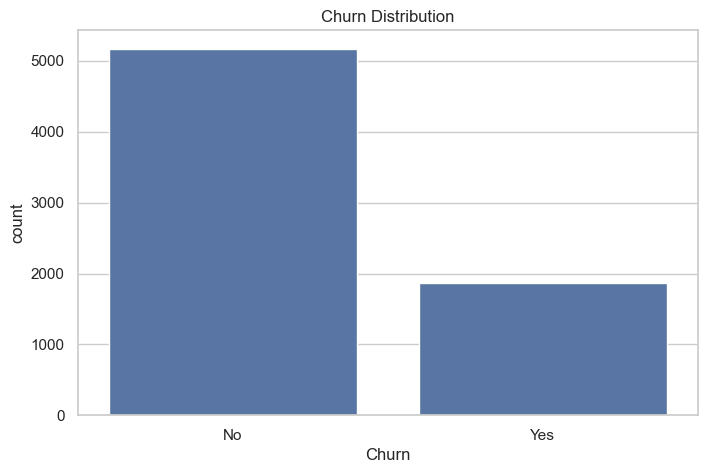

In [13]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Churn', data=data)
plt.title("Churn Distribution")
plt.show()

### Plot churn as a percentage using a pie chart

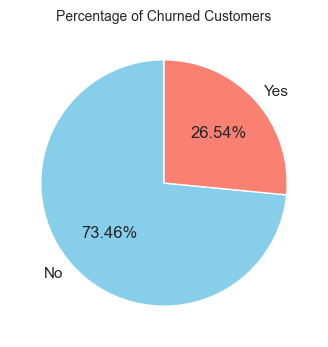

In [32]:
plt.figure(figsize=(4, 4))
gb = data.groupby("Churn").agg({"Churn": "count"})
plt.pie(gb['Churn'], labels=gb.index, autopct='%1.2f%%', startangle=90, colors=["skyblue", "salmon"])
plt.title("Percentage of Churned Customers", fontsize=10)
plt.show()

### Analyze churn by gender

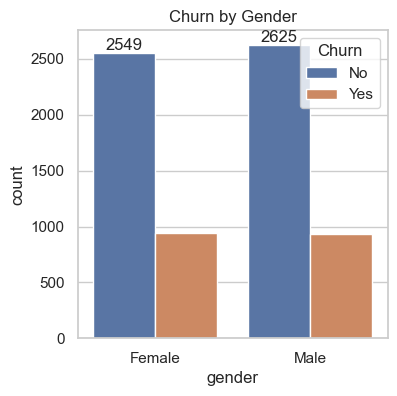

In [34]:
plt.figure(figsize=(4, 4))
ax = sns.countplot(x="gender", data=data, hue="Churn")
ax.bar_label(ax.containers[0])
plt.title("Churn by Gender")
plt.show()

### Analyze churn by SeniorCitizen status

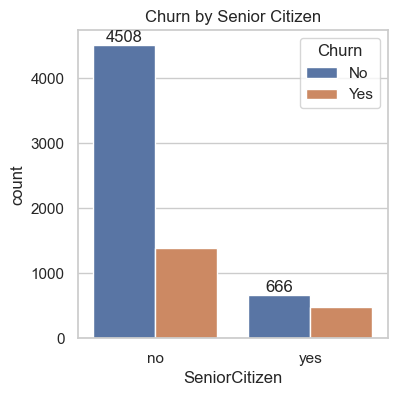

In [36]:
plt.figure(figsize=(4, 4))
ax = sns.countplot(x="SeniorCitizen", data=data, hue="Churn")
ax.bar_label(ax.containers[0])
plt.title("Churn by Senior Citizen")
plt.show()

### Plot percentages of churn by SeniorCitizen status

C:\Users\Administrator\AppData\Local\Temp\ipykernel_16164\2508264125.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(j, bottoms[j] + value / 2, f"{value:.1f}%", ha='center', va='center', fontsize=10)


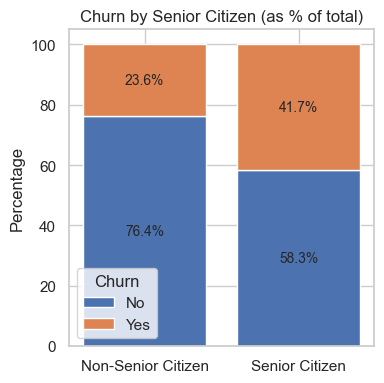

In [38]:
percentages = data.groupby(['SeniorCitizen', 'Churn']).size().unstack()
percentages = percentages.div(percentages.sum(axis=1), axis=0) * 100

fig, ax = plt.subplots(figsize=(4, 4))
categories = percentages.columns
bottoms = [0] * len(percentages)

for i, category in enumerate(categories):
    ax.bar(percentages.index, percentages[category], bottom=bottoms, label=category)
    for j, value in enumerate(percentages[category]):
        ax.text(j, bottoms[j] + value / 2, f"{value:.1f}%", ha='center', va='center', fontsize=10)
    bottoms += percentages[category]

ax.set_xticks(percentages.index)
ax.set_xticklabels(['Non-Senior Citizen', 'Senior Citizen'])
ax.set_ylabel("Percentage")
ax.set_title("Churn by Senior Citizen (as % of total)")
ax.legend(title="Churn")
plt.tight_layout()
plt.show()

### Analyze churn by tenure

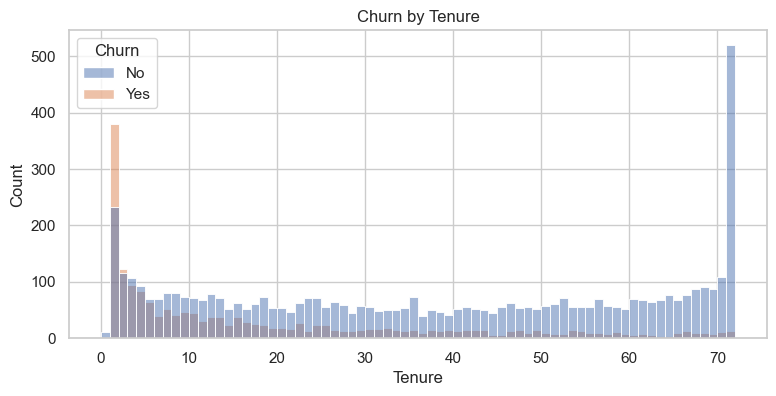

In [40]:
plt.figure(figsize=(9, 4))
sns.histplot(x='tenure', data=data, bins=72, hue="Churn", kde=False)
plt.title("Churn by Tenure")
plt.xlabel("Tenure")
plt.ylabel("Count")
plt.show()

### Analyze churn by contract type

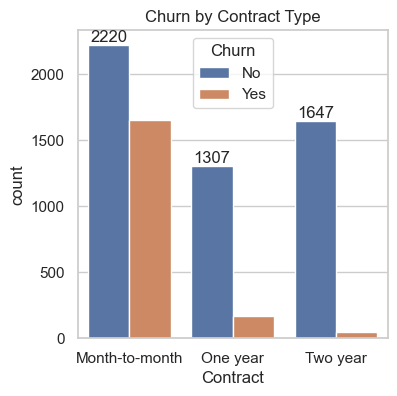

In [42]:
plt.figure(figsize=(4, 4))
ax = sns.countplot(x="Contract", data=data, hue="Churn")
ax.bar_label(ax.containers[0])
plt.title("Churn by Contract Type")
plt.show()

## Subplots for specific columns against churn

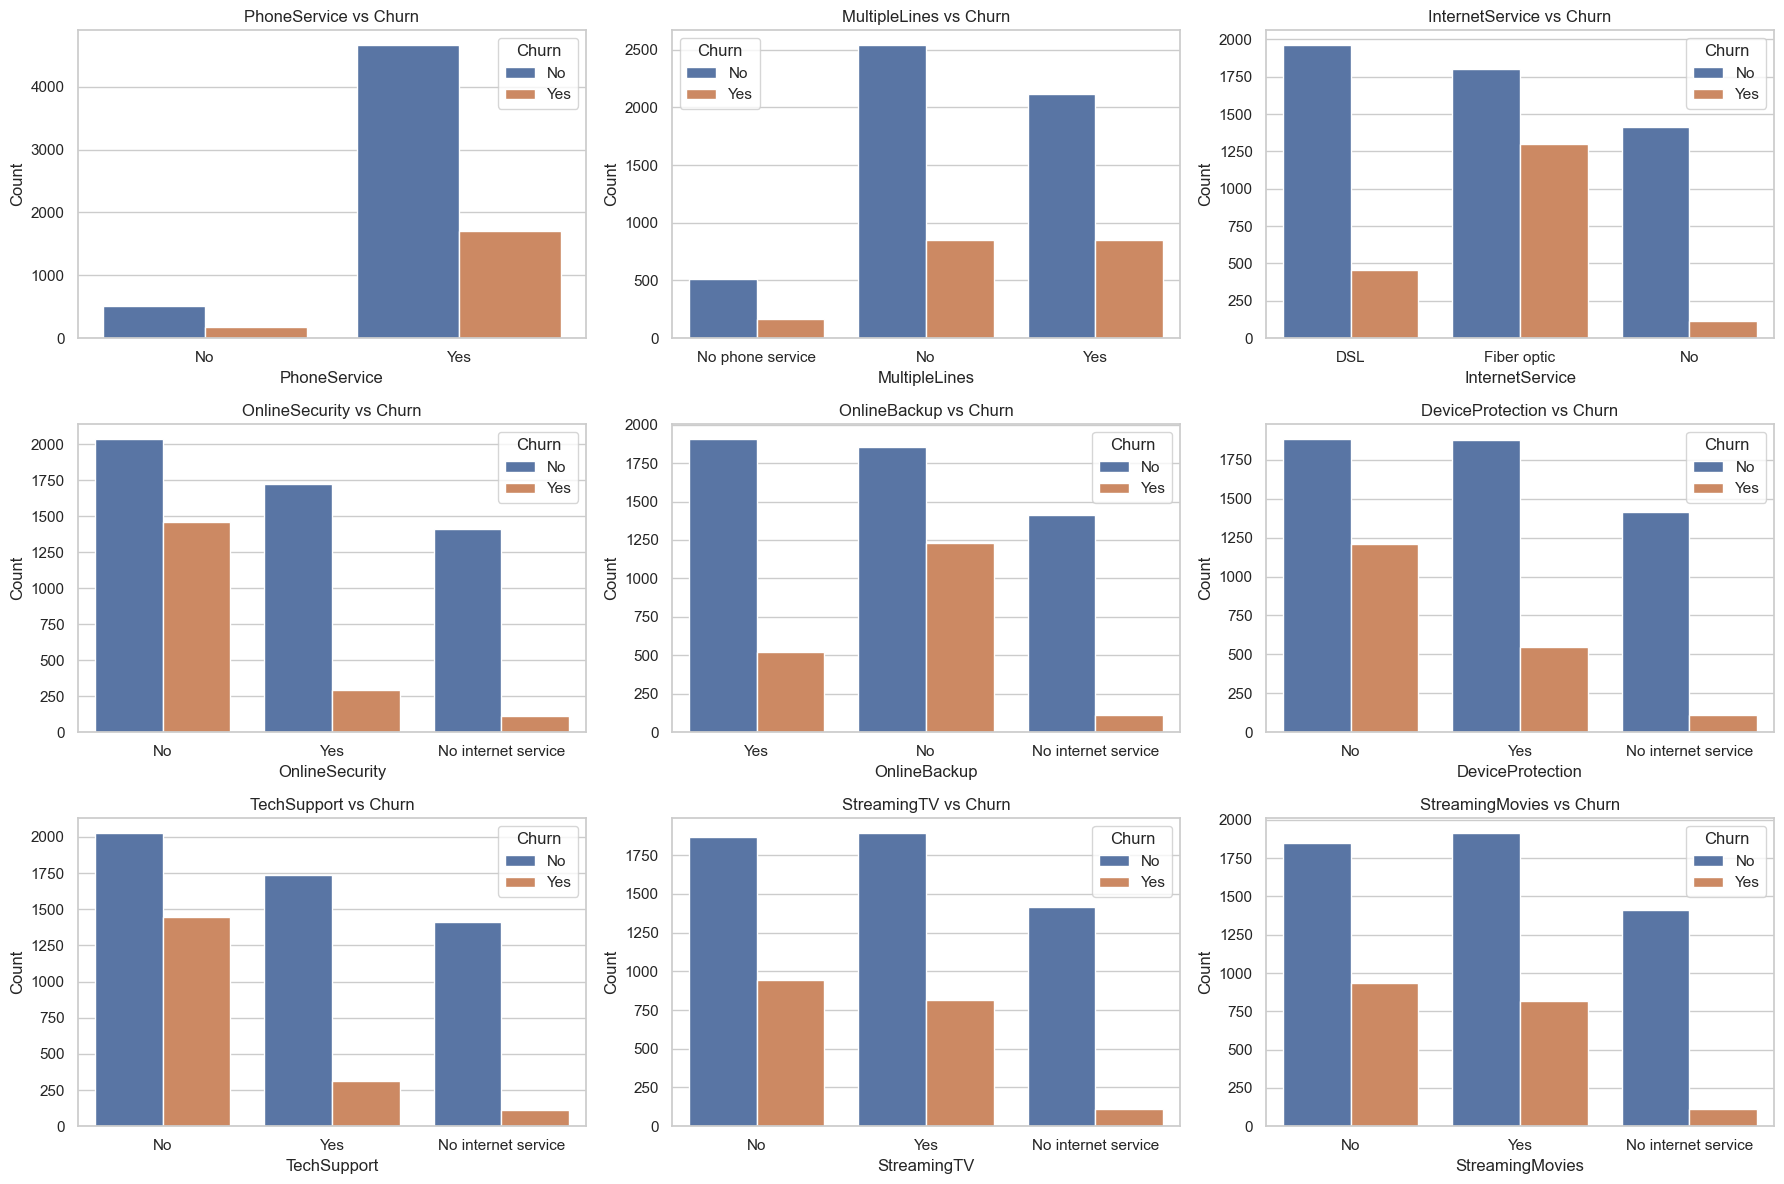

In [44]:
columns = [
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 12))
axes = axes.flatten()

for i, col in enumerate(columns):
    ax = axes[i]
    sns.countplot(data=data, x=col, hue="Churn", ax=ax)
    ax.set_title(f"{col} vs Churn")
    ax.set_xlabel(col)
    ax.set_ylabel("Count")
    ax.legend(title="Churn")

plt.tight_layout()
plt.show()


### Analyze churn by payment method

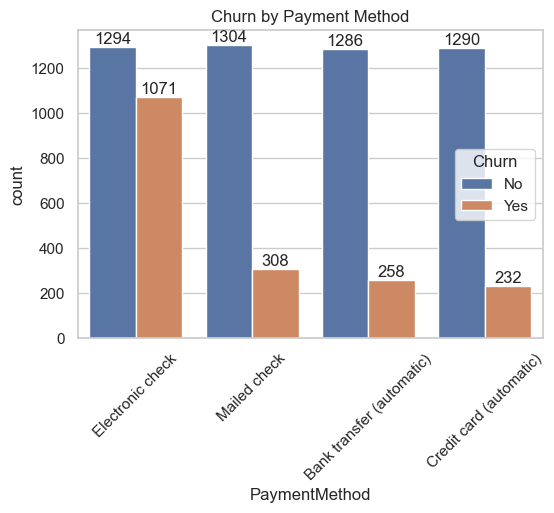

In [46]:
plt.figure(figsize=(6, 4))
ax = sns.countplot(x="PaymentMethod", data=data, hue="Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Churn by Payment Method")
plt.xticks(rotation=45)
plt.show()

### Distribution of numerical columns

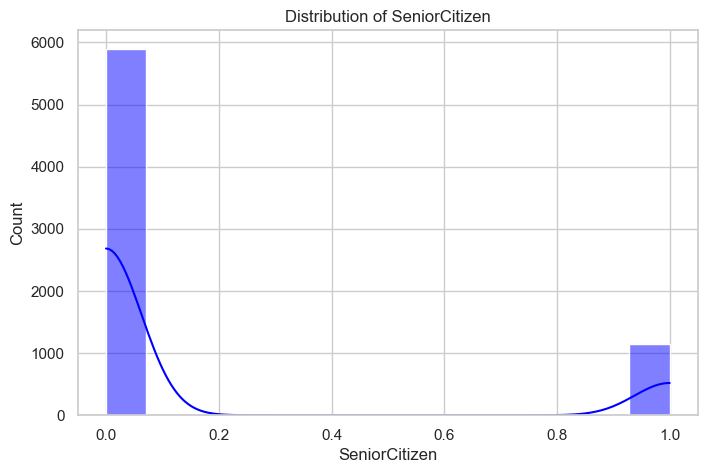

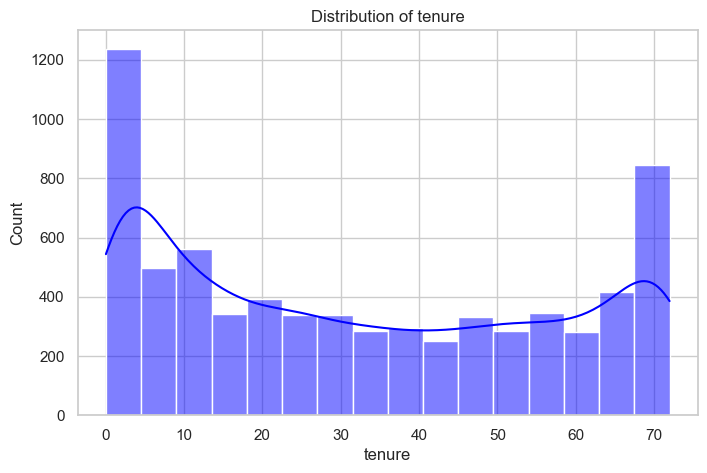

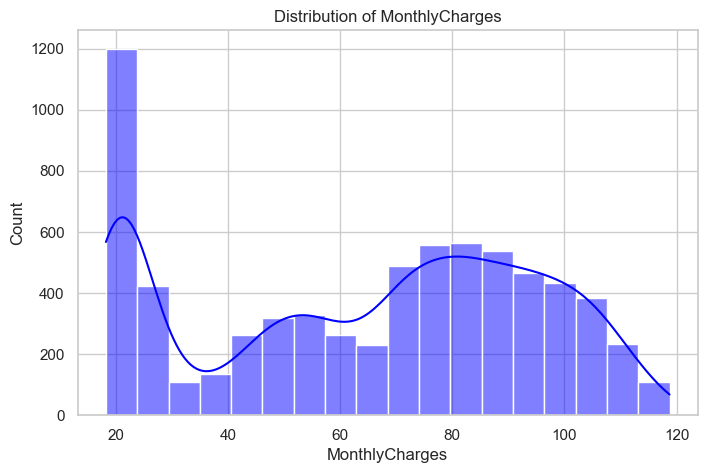

In [14]:
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(data[col], kde=True, color='blue')
    plt.title(f"Distribution of {col}")
    plt.show()

## Bivariate Analysis
### Analyze the relationship between churn and tenure

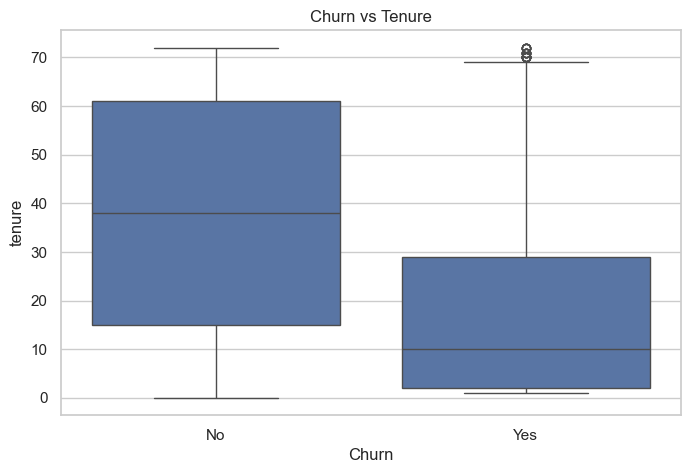

In [16]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Churn', y='tenure', data=data)
plt.title("Churn vs Tenure")
plt.show()

## Feature Engineering
### Encoding categorical variables using one-hot encoding

In [20]:
categorical_columns = data.select_dtypes(include=['object']).columns
encoded_data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

In [21]:
# Display the updated dataset
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
